In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from skimage import io
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.util import img_as_float

In [3]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

# Exercise 1

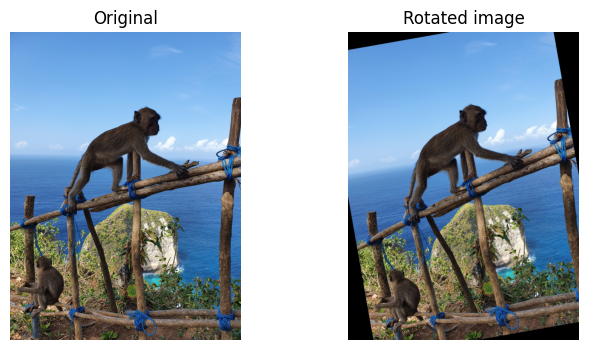

In [4]:
im_org = io.imread('data/NusaPenida.png')

# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

# Exercise 2

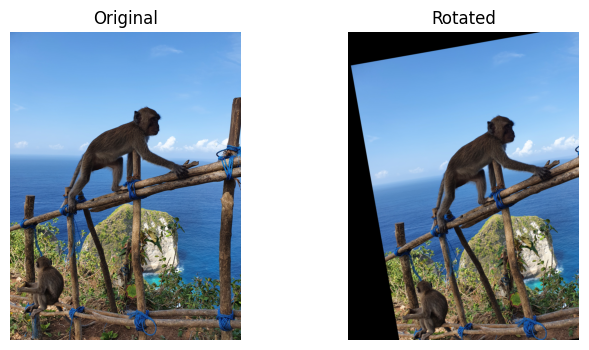

In [5]:
rot_center_1 = [500, 0]
rotated_img_1 = rotate(im_org, rotation_angle, center=rot_center_1)

rot_center_2 = [0, 500]
rotated_img_2 = rotate(im_org, rotation_angle, center=rot_center_2)

show_comparison(im_org, rotated_img_1, "Rotated")

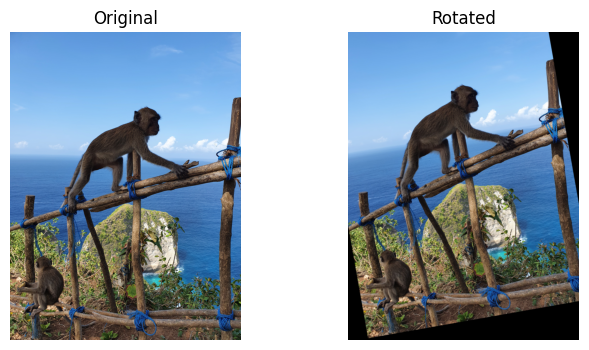

In [6]:
show_comparison(im_org, rotated_img_2, "Rotated")

# Exercise 3

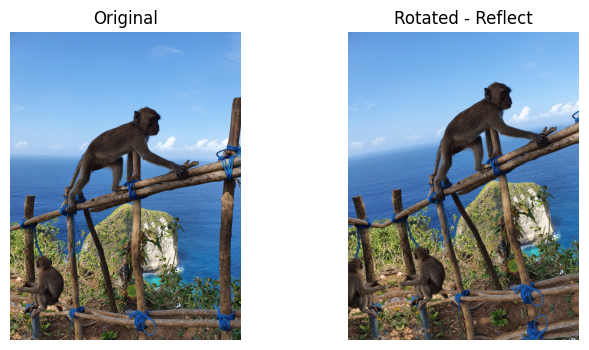

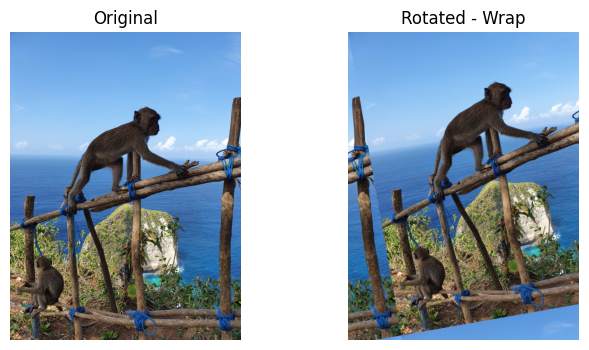

In [7]:
rot_center = [0, 0]
rotated_img_reflect = rotate(im_org, rotation_angle, center=rot_center, mode="reflect")
rotated_img_wrap = rotate(im_org, rotation_angle, center=rot_center, mode="wrap")

show_comparison(im_org, rotated_img_reflect, "Rotated - Reflect")
show_comparison(im_org, rotated_img_wrap, "Rotated - Wrap")

# Exercise 4

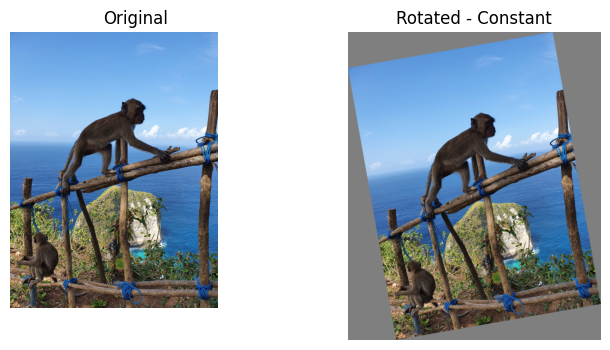

In [8]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=0.5)
show_comparison(im_org, rotated_img, "Rotated - Constant")

# Exercise 5

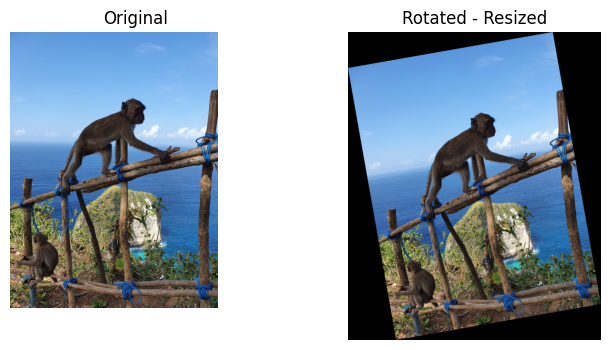

In [9]:
rotated_img_resized = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img_resized, "Rotated - Resized")

# Exercise 6

In [10]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


# Exericse 7

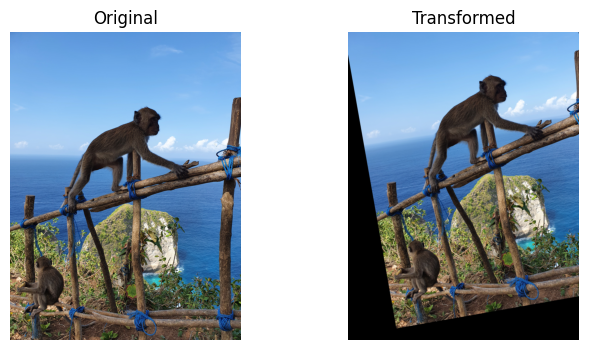

In [11]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Transformed")

# Exercise 8

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


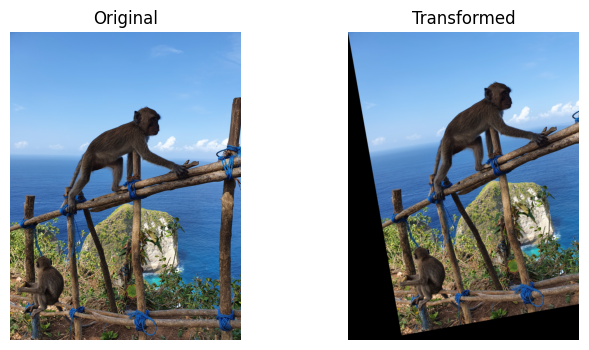

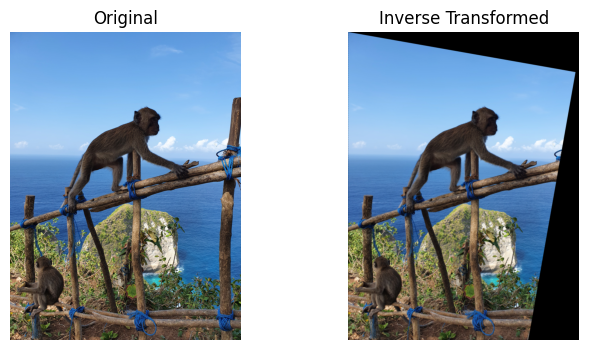

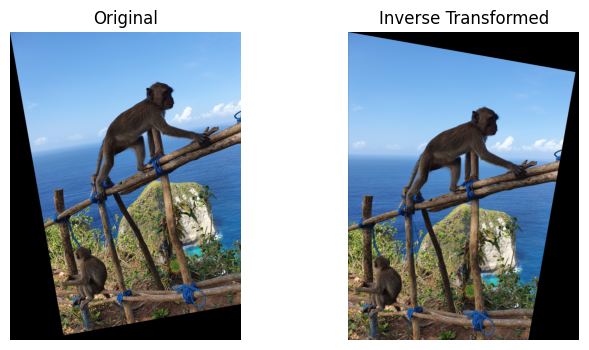

In [12]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [0, 0]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)

print(tform.params)
transformed_img = warp(im_org, tform)
inv_transformed_img = warp(transformed_img, tform.inverse)
show_comparison(im_org, transformed_img, "Transformed")
show_comparison(im_org, inv_transformed_img, "Inverse Transformed")
show_comparison(transformed_img, inv_transformed_img, "Inverse Transformed")

I don't understand why inv_transformed_img isn't back to the original. Maybe it is because the rotation center is different?

# Exercise 9

In [13]:
tform = SimilarityTransform(rotation=15, translation=[40, 30], scale=0.6)
print(tform.params)

[[-0.45581275 -0.3901727  40.        ]
 [ 0.3901727  -0.45581275 30.        ]
 [ 0.          0.          1.        ]]


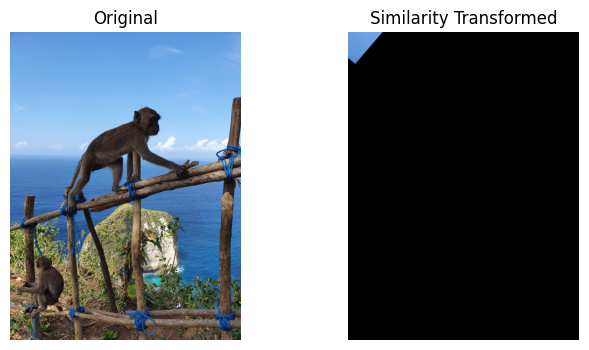

In [14]:
sim_trans_image = warp(im_org, tform)
show_comparison(im_org, sim_trans_image, "Similarity Transformed")

# Exercise 10

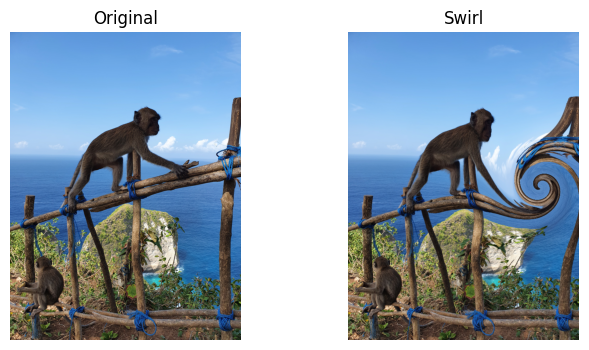

In [15]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Swirl")

# Exercise 11

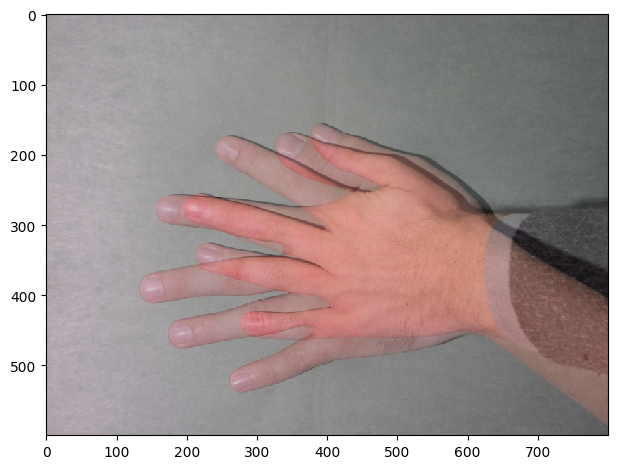

In [16]:
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')

blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

# Exercise 12

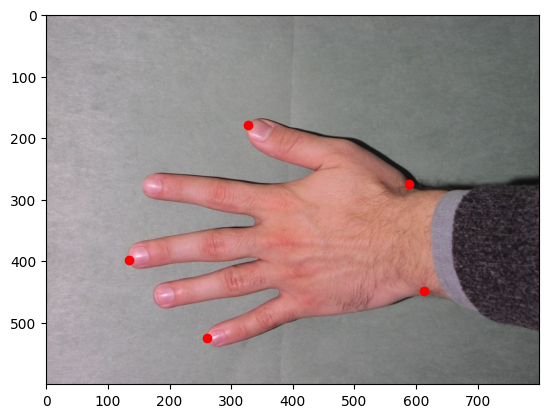

In [17]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

# Exercise 13

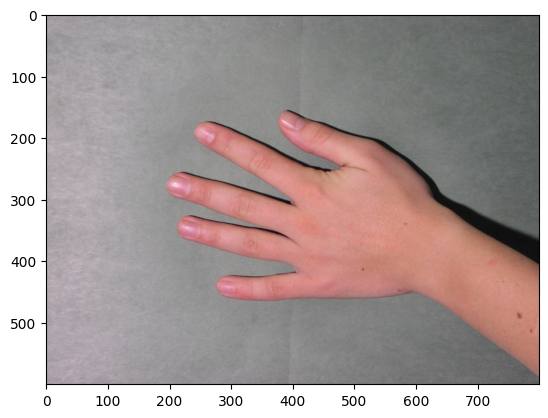

In [18]:
# Find points
#%matplotlib tk
plt.imshow(dst_img)
plt.show()

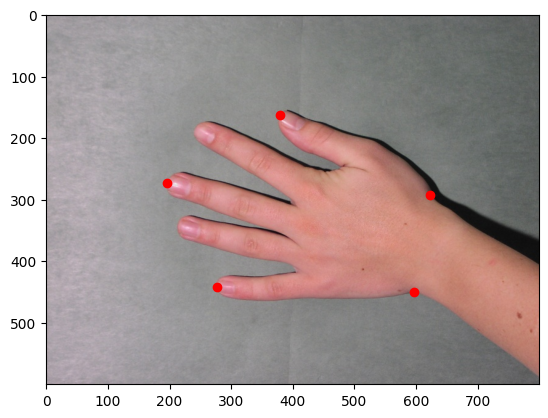

In [20]:
dist = np.array([[622, 292], [380, 163], [196, 273], [277, 442], [596, 450]])
plt.imshow(dst_img)
plt.plot(dist[:, 0], dist[:, 1], '.r', markersize=12)
plt.show()